In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
data=pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',parse_dates=['date'],index_col='date',date_parser=dateparse)['demandas']

C:\Users\marcio\AppData\Local\Temp\ipykernel_9504\2516921193.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')


$d_{i} = 100+10\cos\left(\frac{2\pi\left(i+10\right)}{50}+0.6\pi\right)+e_{i}$

$e_{i} \sim N\left(0,1\right)$

$i=1,...,52$

Text(0, 0.5, '[]')

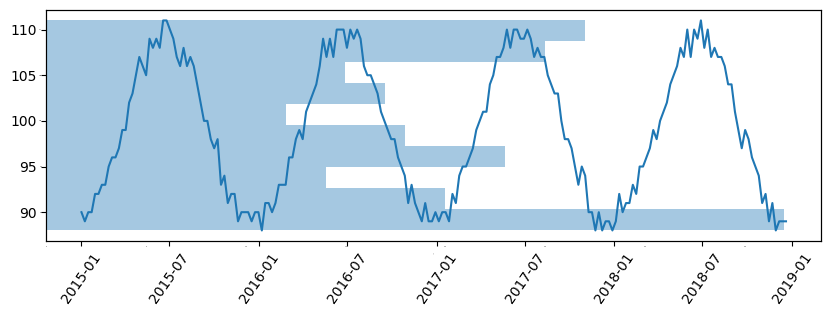

In [3]:
fig=plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=-1, hspace=0)



ax=fig.add_subplot(1,2,1)

plt.plot(data)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

ax=fig.add_subplot(1,2,2)
ax.patch.set_alpha(0)
plt.hist(data,orientation='horizontal',alpha = 0.4)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.tick_params(axis='x', labelsize=0, length=0)
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

# Correlação

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


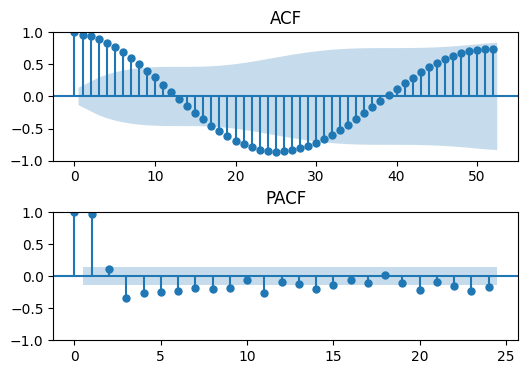

In [4]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.4)


ax=fig.add_subplot(2,1,1)
plot_acf(data,title='ACF',lags=52,alpha=.05,ax=ax)

ax=fig.add_subplot(2,1,2)
plot_pacf(data,title='PACF',ax=ax)

plt.show()

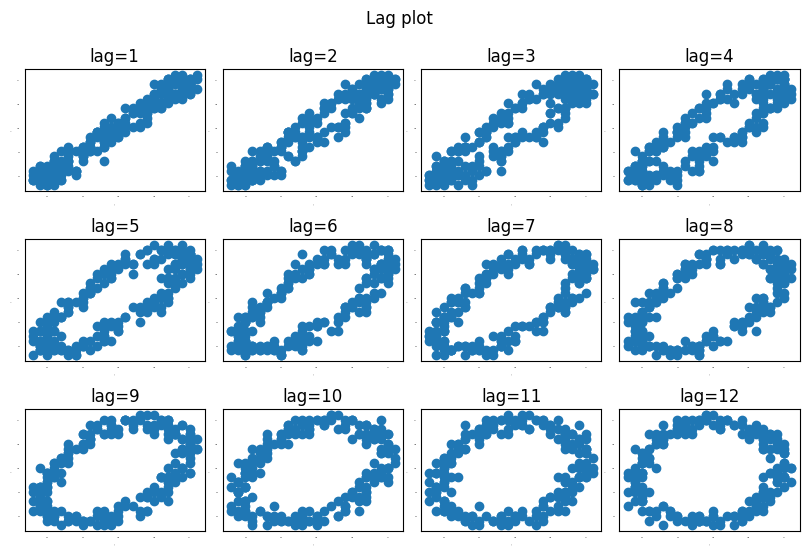

In [5]:
fig=plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
fig.suptitle('Lag plot')

for i in range(12):
    ax=fig.add_subplot(3,4,i+1)
    pd.plotting.lag_plot(data, lag=i+1)
    plt.title(f"lag={i+1}")
    plt.tick_params(axis='y', labelsize=0, length=0)
    plt.tick_params(axis='x', labelsize=0, length=0)
    plt.xlabel([], fontsize=0)
    plt.ylabel([], fontsize=0)
plt.show(block=True)

# Decomposição

In [6]:
decom = seasonal_decompose(data)

## Sazonalidade

<AxesSubplot: xlabel='date'>

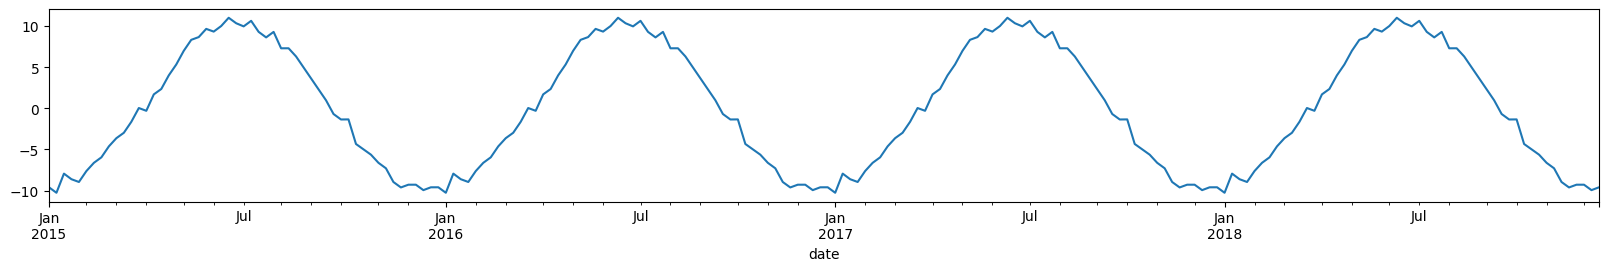

In [7]:
decom.seasonal.plot(figsize=(20,2.5))

<AxesSubplot: xlabel='date'>

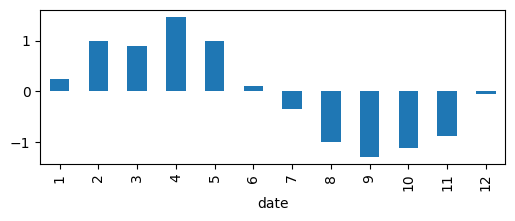

In [8]:
fig=plt.figure(figsize=(6,2))
data.diff().groupby(data.index.month).mean().plot(kind='bar')

## Resíduo

Text(0, 0.5, '[]')

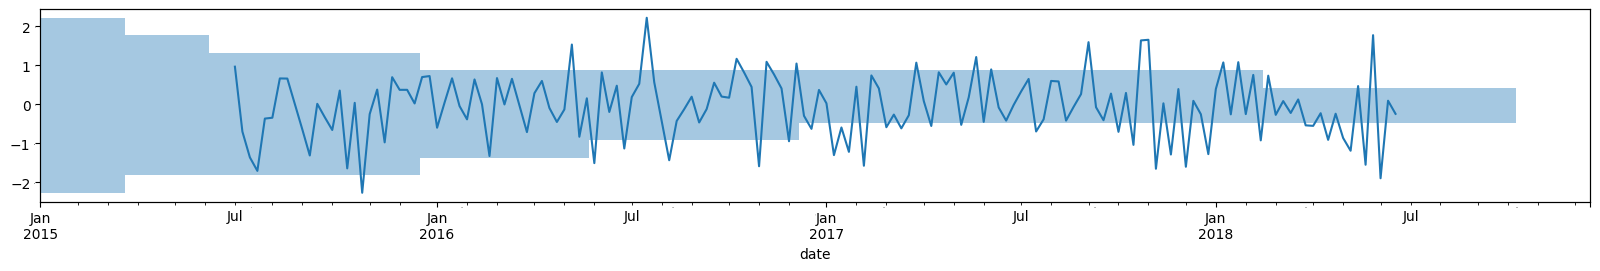

In [9]:
fig=plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=-1, hspace=0)



ax=fig.add_subplot(1,2,1)
decom.resid.plot(figsize=(20,2.5));


ax=fig.add_subplot(1,2,2)
ax.patch.set_alpha(0)
plt.hist(decom.resid,orientation='horizontal',alpha = 0.4)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.tick_params(axis='x', labelsize=0, length=0)
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

## Tendência

<AxesSubplot: xlabel='date'>

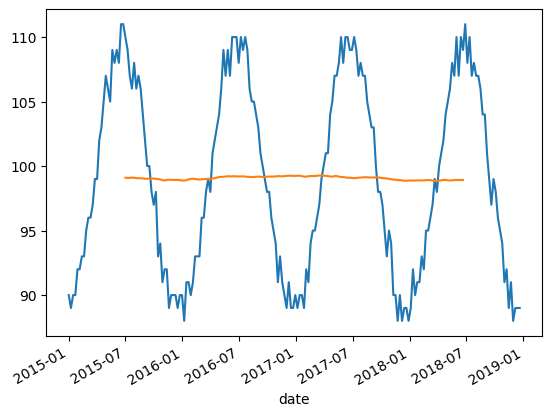

In [10]:

plt.plot(data)
decom.trend.plot()

# Médias Móveis

In [11]:
media_movel = data.rolling(3).mean()

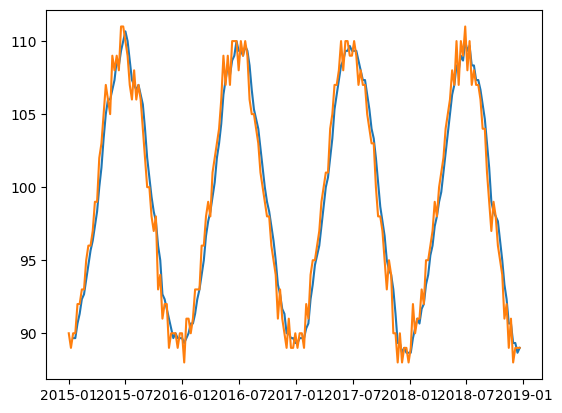

In [12]:
plt.plot(media_movel)
plt.plot(data)